<p style="text-align: center; font-size: 35px">به نام خدا</p>
<p style="text-align: center; font-size: 25px">هوش مصنوعی</p>
<p style="text-align: center; font-size: 25px">تمرین کامپیوتری شماره 3</p>
<p style="text-align: center; font-size: 25px">علی مهرانی</p>
<p style="text-align: center; font-size: 25px">شماره دانشجویی : 810198542</p>

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas
import time
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split
from collections import Counter
import cv2
TESTSPLITRATIO = 0.3
BINARYIMGTHRESHOLD = 200

# Phase 1 - Data analysis

In [63]:
pkl_data_file = open('dataset/data.pkl', 'rb')
data = pickle.load(pkl_data_file)
print(len(data))

pkl_label_file = open('dataset/label.pkl', 'rb')
label = pickle.load(pkl_label_file)
print(len(label))

6000
6000


## train-test split

### q1
In this section we use sklearn library to split data to train and test.   
the split ratio is considered 0.3.   
according to many sources a good ratio to split train-test data should be 0.8/0.2 or 0.7/0.3 or values close.      

In [64]:
label_train, label_test, data_train, data_test = train_test_split(label, data, test_size=TESTSPLITRATIO)

### q2

Text(0.5, 0, 'image of digit 6')

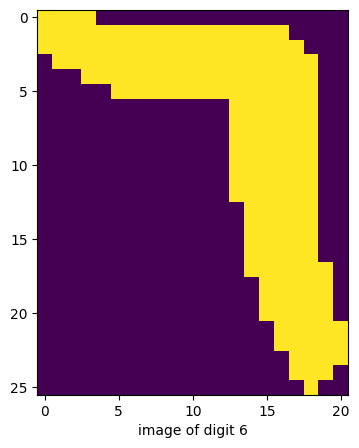

In [65]:
plt.figure(figsize=(10,5))
plt.imshow(data_train[100])
plt.xlabel('image of digit ' + str(label_train[100]))

### q3
In this section we use cv2 package to resize image.  
Then we change all non-0 values to 1 in the newly resized picture.   
The reason we resize pictures is that we can check and compare pixel values with train data directly in naive bayes without having to check image size and scaling.     

In [66]:
data_train_resized = []
data_test_resized = []

for i in data_train :
    row = cv2.resize(i, (20,20))
    #row[row>0]=1 #comment this line to avoid changing non-0 valus to 1
    data_train_resized.append(row)
    
for i in data_test :
    row = cv2.resize(i, (20,20))
    #row[row>0]=1 #comment this line to avoid changing non-0 valus to 1
    data_test_resized.append(row)

print(label_train[105])
print(data_train_resized[105])
print(label_test[100])
print(data_test_resized[100])

8
[[  0   0   0   0   0   0  10 115 255 149  15   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0  83 255 255 255 121   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0  83 255 255 255 121   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0  61 233 255 255 255 238  95   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0  70 255 255 255 255 255 108   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0  70 255 255 255 255 255 163  36   0   0   0   0   0
    0   0]
 [  0   0   0   0  36 186 255 255 255 255 255 255  96   0   0   0   0   0
    0   0]
 [  0   0   0   0  57 255 255 171  32 138 255 255 235  73   0   0   0   0
    0   0]
 [  0   0   0   6  82 255 255 159   0 106 240 255 255  83   0   0   0   0
    0   0]
 [  0   0   0  44 255 255 224 100   0   0 134 255 255 147  26   0   0   0
    0   0]
 [  0   0   0  44 255 255 172   0   0   0  50 187 255 255  70   0   0   0
    0   0]
 [  0   0  28 229 255 255 172   0   0   0   0 147 255 255 232  

### q4

0
[[  0   0   0   0   0   0   0   0  45 185 255 255 255 255 134   0   0   0
    0   0]
 [  0   0   0   0   0  44  83  83 113 208 255 255 255 255 173  81  35   0
    0   0]
 [  0   0   0   0   0 117 223 223 229 246 255 255 255 255 240 218  95   0
    0   0]
 [  0   0   0  46 106 185 255 255 255 255 255 255 255 255 255 249 108   0
    0   0]
 [  0   0   0 106 242 252 255 255 255 255 255 255 255 255 255 248 108   0
    0   0]
 [  0   0   0 108 249 255 255 255 255 255 255 255 255 255 255 252 185 117
   44   0]
 [  0   6  17 119 249 255 255 255 255 255 255 255 255 255 255 255 255 225
   96  19]
 [  0  52 139 200 252 255 255 255 255 255 255 255 255 255 255 255 255 243
  190 159]
 [ 45 113 229 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [185 208 246 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 243 204 185 185 211 250 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 218 102  45  45 123 239 255 2

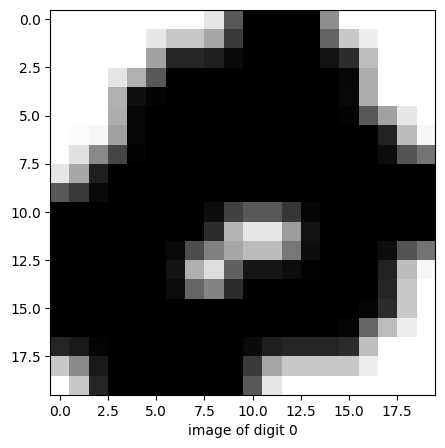

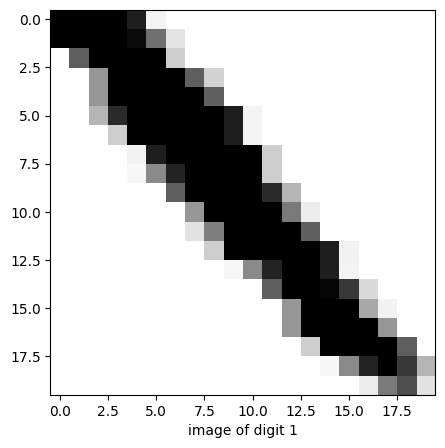

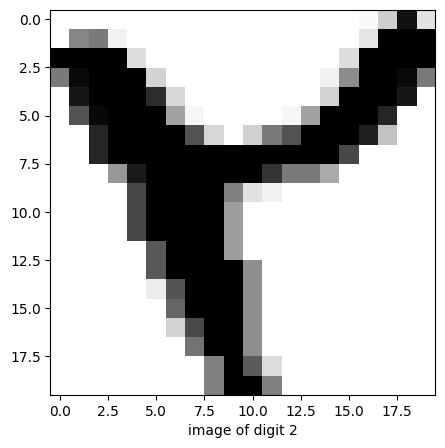

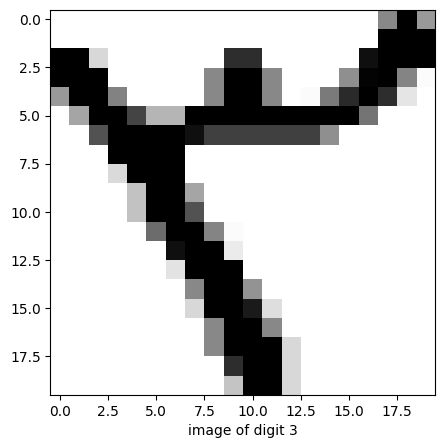

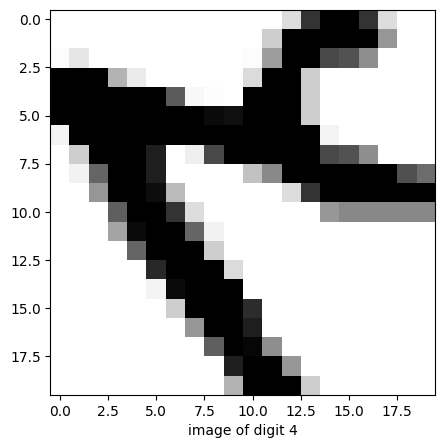

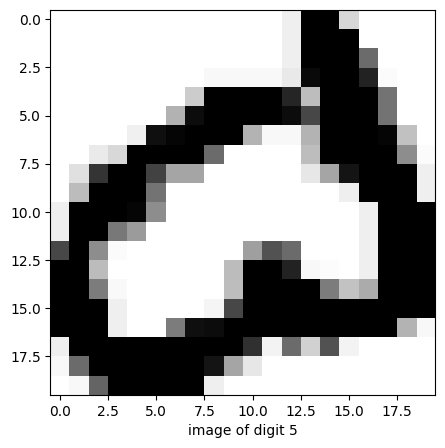

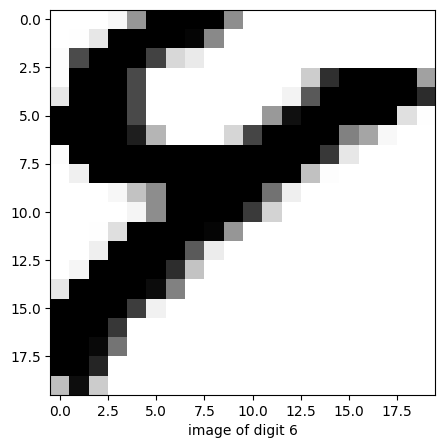

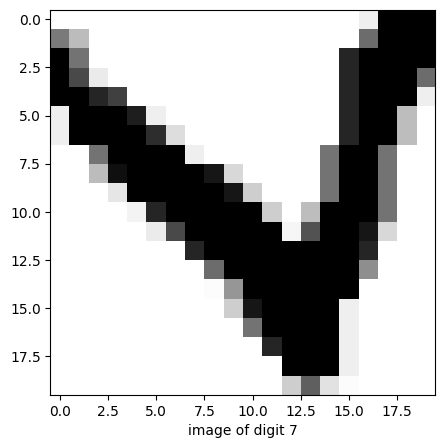

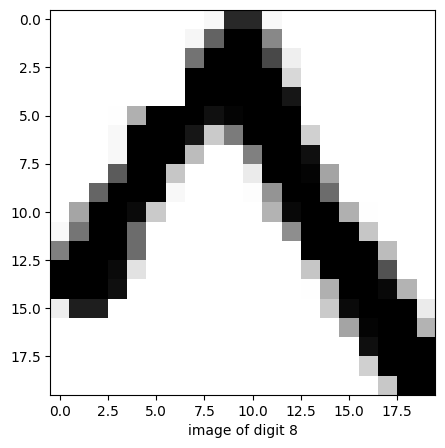

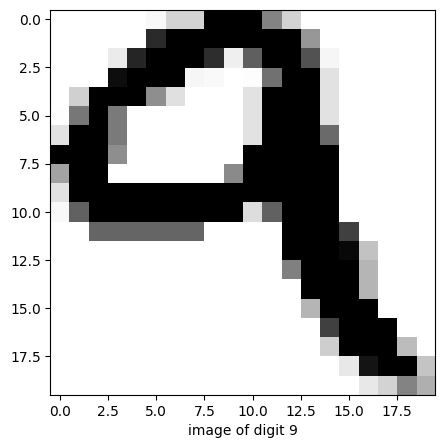

In [68]:
for i in range(0, 10) :
    print(i)
    print(data_train_resized[label_train.index(i)])

for i in range(0,10) :
#     plt.subplot(2,5, i+1)
    plt.figure(figsize=(10,5))
    plt.imshow(data_train_resized[label_train.index(i)], cmap="Greys")
    plt.xlabel('image of digit ' + str(i))
    

### q5

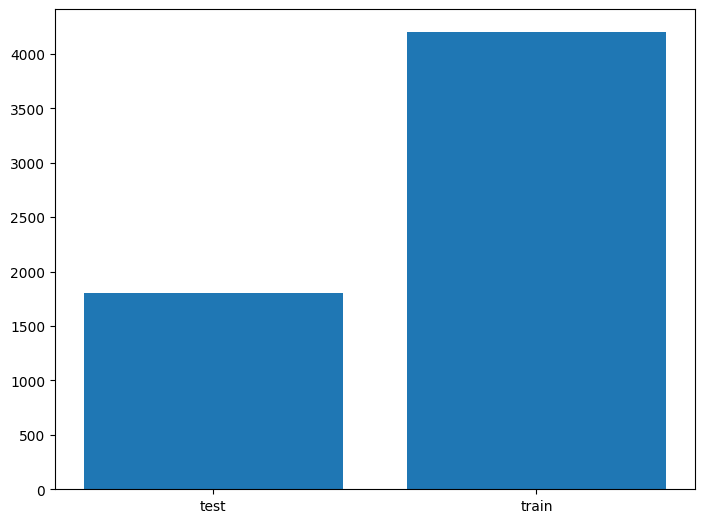

In [69]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sections = ['test','train']
data = [len(data_test_resized), len(data_train_resized)]
ax.bar(sections,data)
plt.show()

### q6   
In this section we use sklearn preprocessing methods to scale image values.   
The reason we do this is that ... 

6
[[1.         1.         1.         0.85098039 0.14901961 0.14901961
  0.14901961 0.14901961 0.14901961 0.14901961 0.14901961 0.14901961
  0.14901961 0.14901961 0.14901961 0.14901961 0.         0.
  0.         0.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.53225806 0.05490196
  0.         0.        ]
 [0.27058824 1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         0.78039216
  0.05490196 0.        ]
 [0.         0.         0.11764706 0.94901961 0.96078431 1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  0.0745098  0.        ]
 [0.         0.         0.         0.         0.14509804 0.65098039
  0.65098039 0.65098039 0.65098039 0.65098039 0.65098039 0.65098039
  0.866666

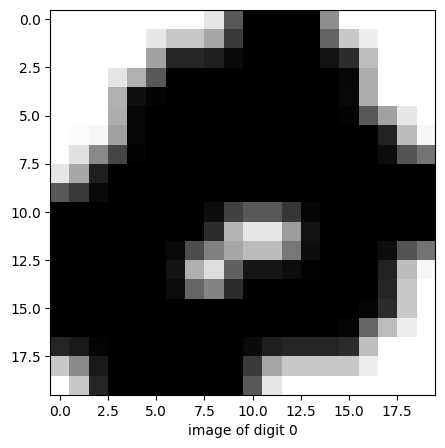

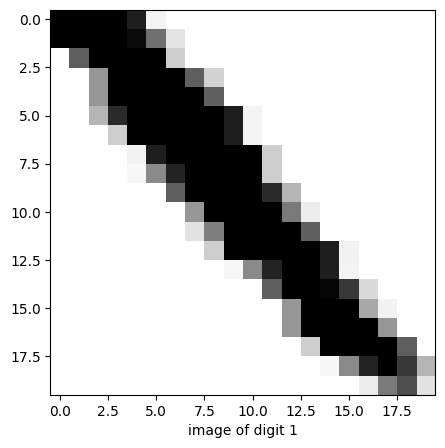

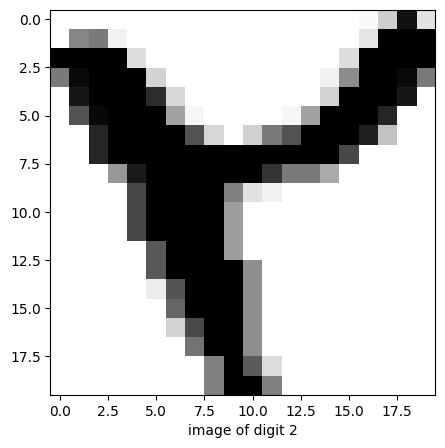

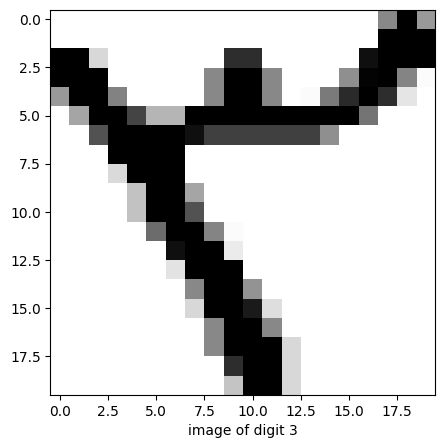

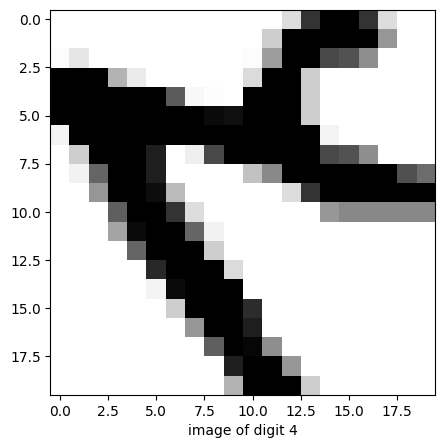

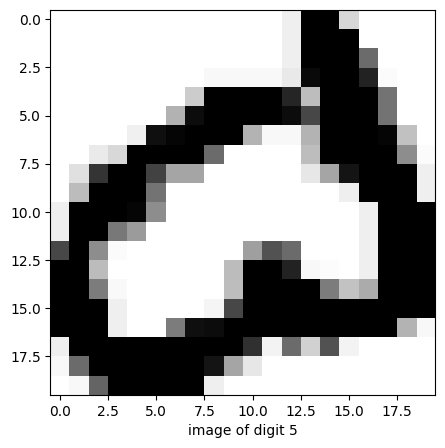

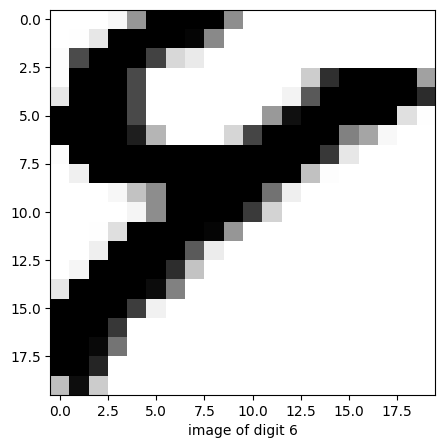

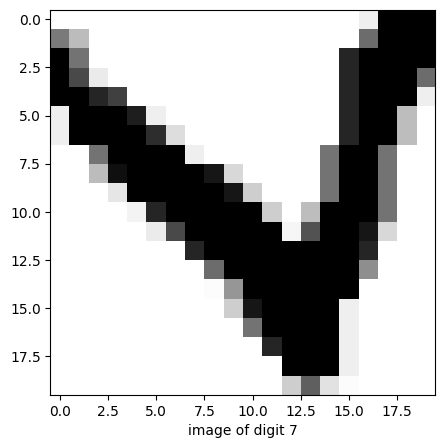

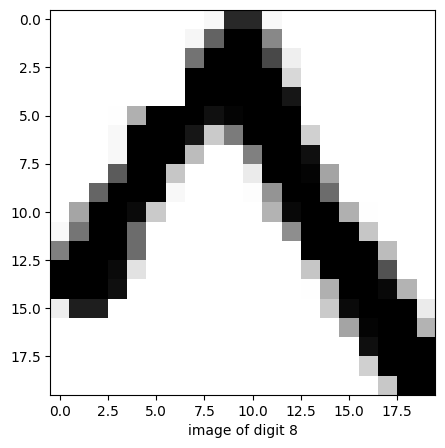

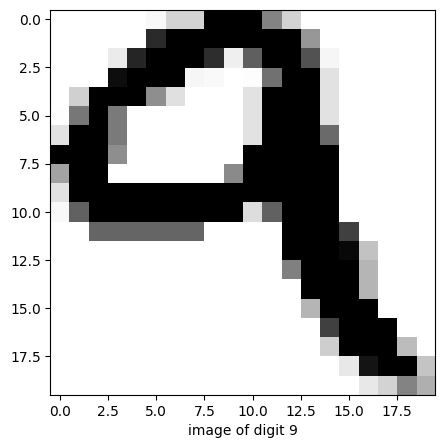

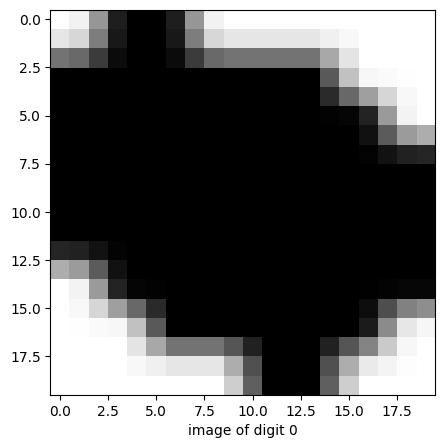

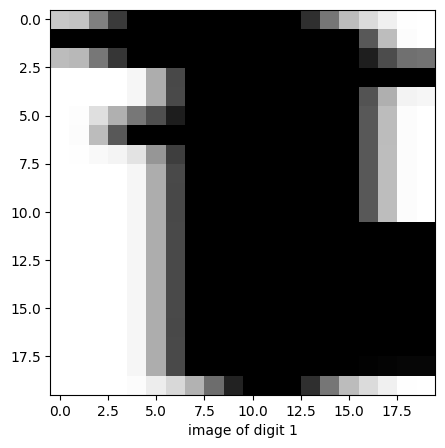

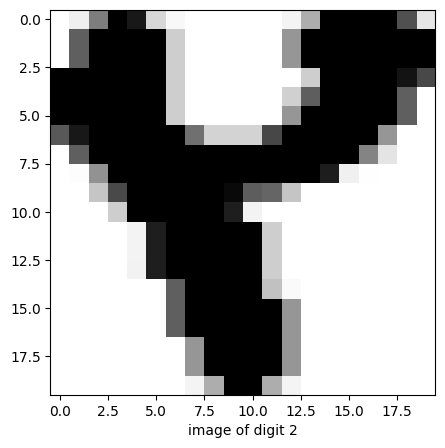

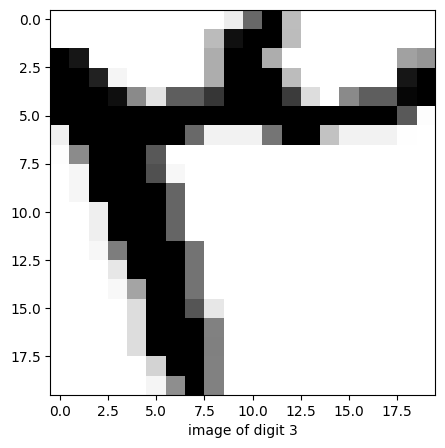

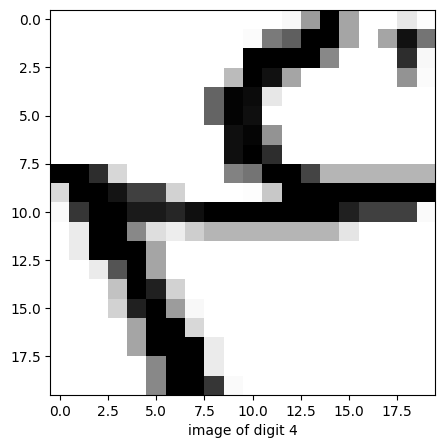

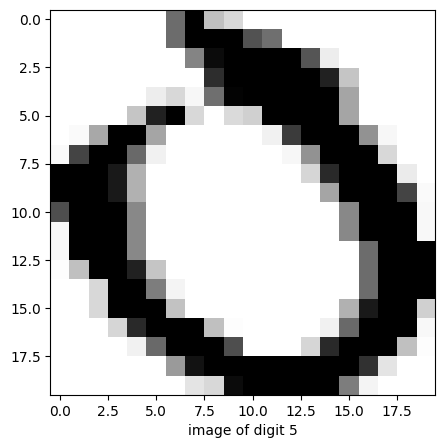

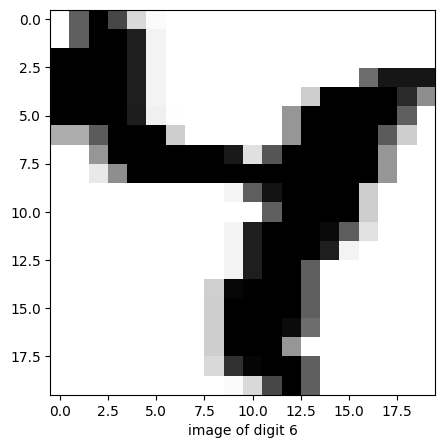

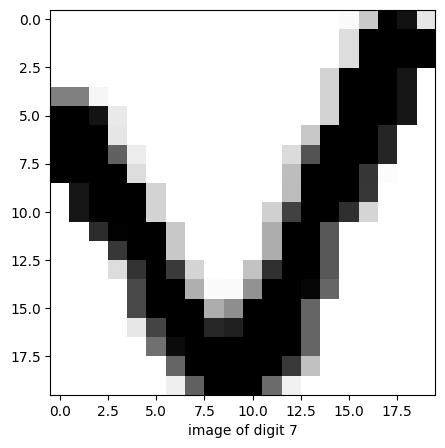

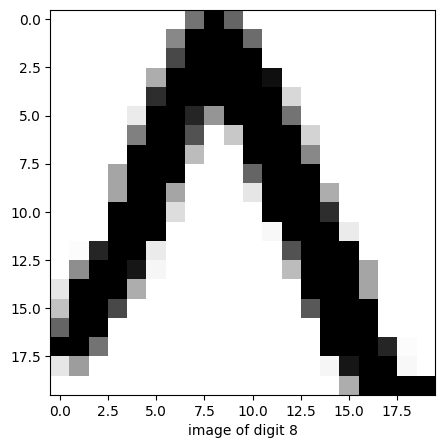

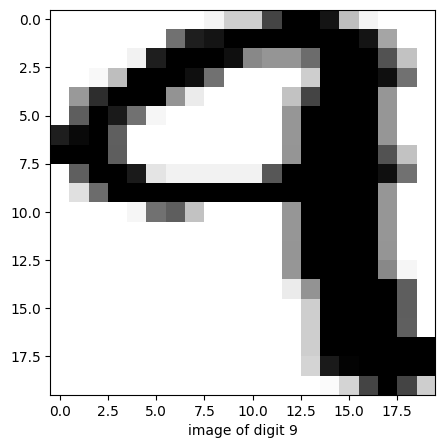

In [90]:
data_train_sc_rs = []
data_test_sc_rs = []
for data_tr in data_train_resized :
    data_tr = pre.MinMaxScaler().fit_transform(data_tr)
    data_train_sc_rs.append(data_tr)
for data_ts in data_test_resized :
    data_ts = pre.MinMaxScaler().fit_transform(data_ts)
    data_test_sc_rs.append(data_ts)
for i in range(0,10) :
    plt.figure(figsize=(10,5))
    plt.imshow(data_train_resized[label_train.index(i)], cmap="Greys")
    plt.xlabel('image of digit ' + str(i))

for i in range(0,10) :
    plt.figure(figsize=(10,5))
    plt.imshow(data_test_resized[label_test.index(i)], cmap="Greys")
    plt.xlabel('image of digit ' + str(i))
    
    
print(label_train[100])
print(data_train_sc_rs[100])
print(label_test[100])
print(data_test_sc_rs[100])

# Phase 2 - Problem procedure

### q7   
#### Likelihood:    
It refers to the probability of observing the data that has been observed assuming that the data came from a specific scenario.        
For example you have symptoms of covid and you got positiive in test, likelihood refers to probability of observing the data to
check whether you really have covid or not. (Its calculation of likelihood in 2 scenarios which is that you have covid or not!)   
for example likelihood of observing a positive result in covid test given that you do not really have covid.   
#### prior:   
In the previous example(covid test), prior is the probability of (having) the disease before seeing(checking) any kind of test result.   
#### predictor:   
In the previous example predictor refers to thr probablity of getting (positive) test result.   
#### posterior:   
It refers to the probability of having disease knowing that you have positive test (or other scenarios).   


Another example would be the rain-predict problem in course slides which was :   
p(rain | predict) = p(predict|rain)p(rain)/p(predict)   
likelihood is probability of correct prediction when it rains (0.9 given in problem description).   
prior is general probability of raining.   
predictor is probability of correct prediction in all scenarios (raining or not raining).   
posterior is probability of raining knowing that it has been predicted!   


## Bernoulli Naive Bayes

Text(0.5, 0, 'image of digit 6')

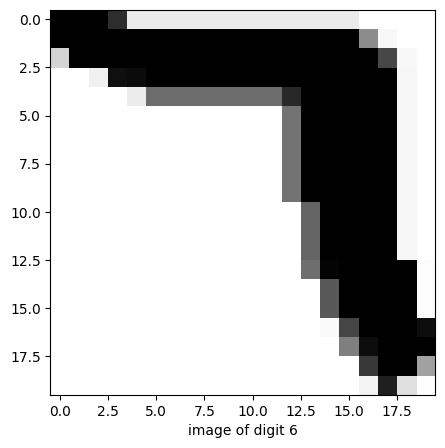

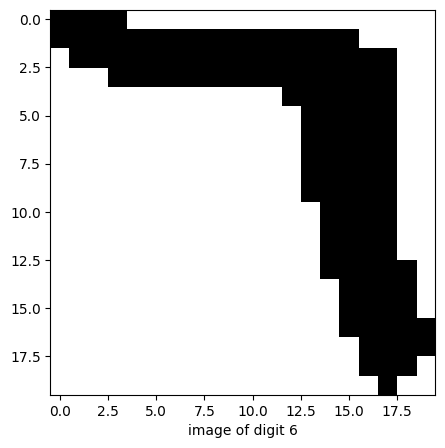

In [110]:
data_train_threshold  =[]
for train_item in data_train_sc_rs :
    ret, thresh = cv2.threshold(train_item, 0.75, 1, cv2.THRESH_BINARY)
    data_train_threshold.append(thresh)
    
# ret, thresh1 = cv2.threshold(data_train_sc_rs[100], 0.75, 1, cv2.THRESH_BINARY)
# print(data_train_threshold[4199])

plt.figure(figsize=(10,5))
plt.imshow(data_train_sc_rs[100], cmap="Greys")
plt.xlabel('image of digit ' + str(label_train[100]))

plt.figure(figsize=(10,5))
plt.imshow(data_train_threshold[100], cmap="Greys")
plt.xlabel('image of digit ' + str(label_train[100]))

In [99]:
bernoulliProb = [dict() for x in range(10)]
for i in range(10) :
    bernoulliProb[i]["number"] = i
print(bernoulliProb)

[{'number': 0}, {'number': 1}, {'number': 2}, {'number': 3}, {'number': 4}, {'number': 5}, {'number': 6}, {'number': 7}, {'number': 8}, {'number': 9}]


In [111]:
numberCnt = Counter(label_train)
print(numberCnt)
pixel_sum_0  = []
# for i in range(len())

Counter({6: 437, 1: 431, 4: 428, 5: 424, 0: 421, 7: 421, 2: 417, 8: 414, 3: 408, 9: 399})
